# Chain-of-Thought 

## Demand‑Spike Detective, Chain-of-Thoughts

### Outline:
- Setup
- Understand sales data, promotional calendars, etc. 
- Craft a Simple CoT prompt
- Craft a More Developed CoT Prompt

## 1. Setup

Let's start by setting up the environment.

In [ ]:
# Import necessary libraries
# No changes needed in this cell

import os
import pandas as pd
from IPython.display import Markdown, display
from utilites_cot import (
    # Helpers
    OpenAIModels,
    display_responses,
    # Synthetic data
    get_competitor_pricing_data,
    get_completion,
    get_promotions_data,
    get_sales_data,
    get_weather_data,
)
from openai import OpenAI

MODEL = OpenAIModels.GPT_41_NANO


In [1]:
from dotenv import load_dotenv
load_dotenv()

True

In [ ]:
# If using the Vocareum API endpoint
# No changes needed in this cell

client = OpenAI(
    base_url="https://openai.vocareum.com/v1",
    # Uncomment one of the following
    api_key=os.getenv("OPENAI_API_KEY")  # <--- TODO: Fill in your Vocareum API key here
    # api_key=os.getenv(
    #     "OPENAI_API_KEY"
    # ),  # <-- Alternately, set as an environment variable (more secure)
)

# If using OpenAI's API endpoint
# client = OpenAI()


## 2. Understand sales data, promotional calendars, etc.

First, let's review the sample data provided. Working with AI Agents is still a data problem at its core, so the first steps are always to understand the business goals (explain the cause for the spike) and the underlying data.

In [3]:
# View the data
get_sales_data()[:3]

[{'date': datetime.date(2024, 1, 10),
  'product_id': 'P001',
  'product_name': 'Product 1',
  'quantity': 255,
  'revenue': 15547.35},
 {'date': datetime.date(2024, 1, 10),
  'product_id': 'P002',
  'product_name': 'Product 2',
  'quantity': 65,
  'revenue': 2297.1},
 {'date': datetime.date(2024, 1, 10),
  'product_id': 'P003',
  'product_name': 'Product 3',
  'quantity': 90,
  'revenue': 7301.7}]

In [4]:
# Load the simulated data
# No changes needed in this cell

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)

sales_data = get_sales_data()
sales_df = pd.DataFrame(sales_data)

promotions_data = get_promotions_data()
promotions_df = pd.DataFrame(promotions_data)

weather_data = get_weather_data()
weather_df = pd.DataFrame(weather_data)

competitor_pricing_data = get_competitor_pricing_data()
competitor_pricing_df = pd.DataFrame(competitor_pricing_data)


In [5]:
# Show the sales data
# No changes needed in this cell

sales_df = sales_df.sort_values(by=["product_id", "date"]).reset_index(drop=True)
sales_df


,date,product_id,product_name,quantity,revenue
0,2024-01-10,P001,Product 1,255,15547.35
1,2024-01-11,P001,Product 1,235,14327.95
2,2024-01-12,P001,Product 1,310,18900.70
3,2024-01-13,P001,Product 1,302,18412.94
4,2024-01-14,P001,Product 1,305,18595.85
5,2024-01-15,P001,Product 1,301,18351.97
6,2024-01-16,P001,Product 1,226,13779.22
7,2024-01-10,P002,Product 2,65,2297.10
8,2024-01-11,P002,Product 2,86,3039.24
9,2024-01-12,P002,Product 2,80,2827.20


In [9]:
# Show the promotions data
# No changes needed in this cell

promotions_df

,promotion_id,name,discount,products,start_date,end_date
0,PROMO001,Weekend Special,10% off,[P002],2024-01-12,2024-01-14
1,PROMO002,Flash Sale,15% off,"[P001, P003, P005]",2024-01-15,2024-01-16


In [10]:
# Show the weather data
# No changes needed in this cell

weather_df.head()

,date,temperature,conditions
0,2024-01-10,"{'fahrenheit': 23.4, 'celsius': -4.8}","{'main': 'Clear', 'precipitation': 'None', 'precipitation_amount': 0, 'special_event': None}"
1,2024-01-11,"{'fahrenheit': 39.3, 'celsius': 4.1}","{'main': 'Clear', 'precipitation': 'None', 'precipitation_amount': 0, 'special_event': None}"
2,2024-01-12,"{'fahrenheit': 41.1, 'celsius': 5.1}","{'main': 'Heavy Rain', 'precipitation': 'Heavy Rain', 'precipitation_amount': 2.7, 'special_event': 'Flood Warning'}"
3,2024-01-13,"{'fahrenheit': 27.2, 'celsius': -2.6}","{'main': 'Clear', 'precipitation': 'None', 'precipitation_amount': 0, 'special_event': None}"
4,2024-01-14,"{'fahrenheit': 22.9, 'celsius': -5.1}","{'main': 'Clear', 'precipitation': 'None', 'precipitation_amount': 0, 'special_event': None}"


In [11]:
# Show the competitor pricing data
# No changes needed in this cell

competitor_pricing_df

,product,date,our_price,competitor_sales,competitor_a_price,competitor_b_price,competitor_c_price
0,Product 1,2024-01-10,60.97,{},56.88,62.23,51.80
1,Product 1,2024-01-11,60.97,{},59.65,72.47,72.50
2,Product 1,2024-01-12,60.97,"{'CompetitorB': {'original_price': 69.24, 'sale_price': 50.55, 'discount_percentage': 27}, 'CompetitorC': {'original_price': 49.92, 'sale_price': 39.44, 'discount_percentage': 21}}",65.40,50.55,39.44
3,Product 1,2024-01-13,60.97,{},72.13,57.54,51.10
4,Product 1,2024-01-14,60.97,{},72.36,70.04,61.04
5,Product 1,2024-01-15,60.97,{},68.52,59.63,73.03
6,Product 1,2024-01-16,60.97,"{'CompetitorA': {'original_price': 53.84, 'sale_price': 44.69, 'discount_percentage': 17}}",44.69,57.69,70.51
7,Product 2,2024-01-10,35.34,{},34.57,42.01,42.02
8,Product 2,2024-01-11,35.34,"{'CompetitorB': {'original_price': 40.13, 'sale_price': 29.29, 'discount_percentage': 27}, 'CompetitorC': {'original_price': 28.93, 'sale_price': 22.85, 'discount_percentage': 21}}",37.91,29.29,22.85
9,Product 2,2024-01-12,35.34,{},41.81,33.35,29.62


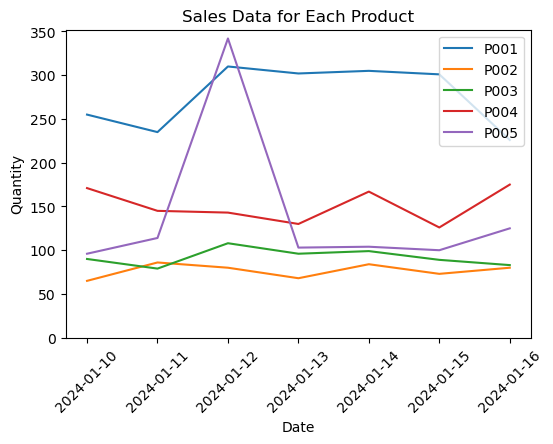

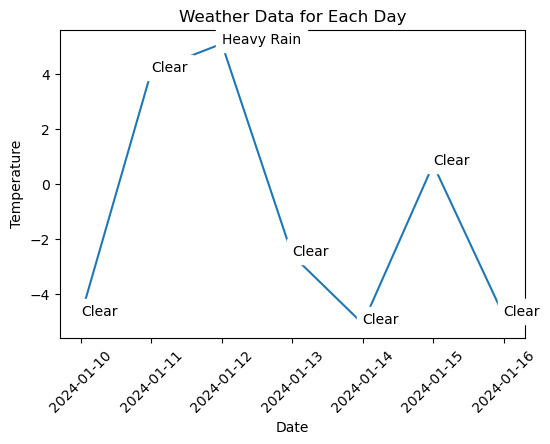

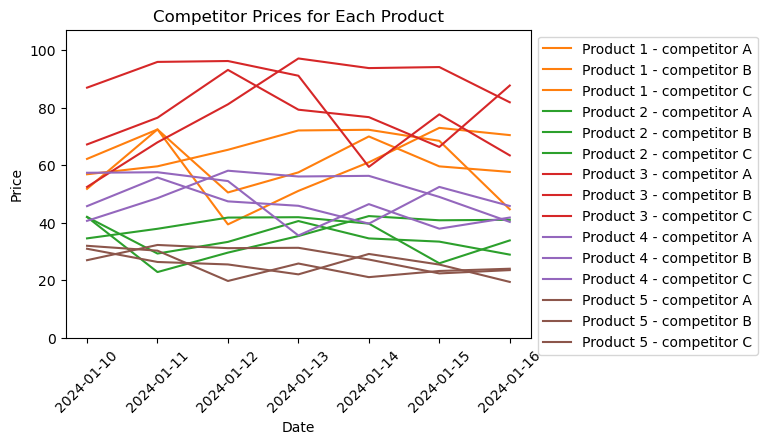

In [6]:
# Graph the sales data
# No changes needed in this cell

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
for product_id, product_data in sales_df.groupby("product_id"):
    product_data.sort_values(by="date", inplace=True)
    plt.plot(product_data["date"], product_data["quantity"], label=product_id)
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.title("Sales Data for Each Product")
plt.xticks(rotation=45)
plt.ylim(0, sales_df["quantity"].max() + 10)
plt.legend()
plt.show()

# Plot the weather data

weather_df["temperature_c"] = weather_df["temperature"].apply(lambda x: x["celsius"])


plt.figure(figsize=(6, 4))
plt.plot(weather_df["date"], weather_df["temperature_c"])

# For each day, add the value of "main" in text
for i, row in weather_df.iterrows():
    # Add a transparent background to the text
    plt.text(
        row["date"],
        row["temperature_c"],
        row["conditions"]["main"],
        backgroundcolor="white",
    )


plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("Temperature")
plt.title("Weather Data for Each Day")
plt.show()

# Plot the competitor pricing data

plt.figure(figsize=(6, 4))
for product in competitor_pricing_df["product"].unique():
    for competitor in ["a", "b", "c"]:
        plt.plot(
            competitor_pricing_df[competitor_pricing_df["product"] == product]["date"],
            competitor_pricing_df[competitor_pricing_df["product"] == product][
                f"competitor_{competitor}_price"
            ],
            label=f"{product} - competitor {competitor.upper()}",
            color=f"C{product[-1]}",
        )
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("Price")
plt.ylim(0, competitor_pricing_df.filter(like="price").max().max() + 10)
plt.title("Competitor Prices for Each Product")
# Put the legend outside the plot
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

### Reflect on the sales data
Reflection:

* Sales spike for Product 5 on January 12th
* The "Weekend Special" promotion which started on January 12th, but that was for Product 2. Still, it may have had an indirect effect on Product 5.
* Weather was fluctuating between below freezing and above freezing. On the 12th in particular, there was heavy rain.
* As for Competitor pricing, we see that Product 5's price for one competitor dropped on January 12th, which may have led to more overall consumer interest in that product or may have coincided with an ad campaign.

In practice, a human would look at all these factors and more to determine the cause of the sales spike by digging deeper.

Let's see if we can get this far with a CoT prompt, which should at least find the sales spike and provide some reasons similar to what we've observed as human beings.

## 3. Craft a simple CoT prompt

Let's start with a simple CoT prompt. We won't tell the model to which steps to follow. We also won't use any tools in this example.

<div style="color: red">Note: Many modern LLMs may not need an explicit "think in steps" phrase in order to think in steps before providing an answer, as this behavior can be included in training process. Consider running your prompts with and without asking for CoT explicitly. In fact, multiple runs may yield different results, so it's worth simply re-running the same prompts more than once.</div>


In [ ]:

system_prompt_explicit_cot = """
You are a meticulous Retail Demand Analyst.
Your task is to analyze provided sales data and promotion schedules to identify and explain significant sales spikes for specific SKUs.

Think step by step.
"""

system_prompt_no_explicit_cot = """
You are a meticulous Retail Demand Analyst.
Your task is to analyze provided sales data and promotion schedules to identify and explain significant sales spikes for specific SKUs.
"""

user_prompt_analyze = f"""
Analyze the data provided below and hypothesize causes for any observed sales spikes.

Sales Data:
{sales_data}

Promotions Calendar:
{promotions_data}

Weather Data:
{weather_data}

Competitor Pricing Data:
{competitor_pricing_data}
"""

print(f"Sending prompt to {MODEL} model...")
explicit_cot_response_1 = get_completion(
    system_prompt=system_prompt_explicit_cot, user_prompt=user_prompt_analyze,
    model=MODEL,
    client=client
)
no_explicit_cot_response_2 = get_completion(
    system_prompt=system_prompt_no_explicit_cot, user_prompt=user_prompt_analyze,
    model=MODEL,
    client=client
)
print("Response received!\n")

# We compare the explicit CoT and non-ex
display_responses(
    {
        "system_prompt": system_prompt_explicit_cot,
        "user_prompt": user_prompt_analyze,
        "response": explicit_cot_response_1,
    },
    {
        "system_prompt": system_prompt_no_explicit_cot,
        "user_prompt": user_prompt_analyze,
        "response": no_explicit_cot_response_2,
    },
)


Sending prompt to gpt-4.1-nano model...
Response received!



<table><tr><th>System Prompt:<br />
You are a meticulous Retail Demand Analyst.
Your task is to analyze provided sales data and promotion schedules to identify and explain significant sales spikes for specific SKUs.

Think step by step.
<br /><br />User Prompt:<br />
Analyze the data provided below and hypothesize causes for any observed sales spikes.

Sales Data:
[{'date': datetime.date(2024, 1, 10), 'product_id': 'P001', 'product_name': 'Product 1', 'quantity': 255, 'revenue': 15547.35}, {'date': datetime.date(2024, 1, 10), 'product_id': 'P002', 'product_name': 'Product 2', 'quantity': 65, 'revenue': 2297.1}, {'date': datetime.date(2024, 1, 10), 'product_id': 'P003', 'product_name': 'Product 3', 'quantity': 90, 'revenue': 7301.7}, {'date': datetime.date(2024, 1, 10), 'product_id': 'P004', 'product_name': 'Product 4', 'quantity': 171, 'revenue': 8296.92}, {'date': datetime.date(2024, 1, 10), 'product_id': 'P005', 'product_name': 'Product 5', 'quantity': 96, 'revenue': 2587.2}, {'date': datetime.date(2024, 1, 11), 'product_id': 'P001', 'product_name': 'Product 1', 'quantity': 235, 'revenue': 14327.95}, {'date': datetime.date(2024, 1, 11), 'product_id': 'P002', 'product_name': 'Product 2', 'quantity': 86, 'revenue': 3039.24}, {'date': datetime.date(2024, 1, 11), 'product_id': 'P003', 'product_name': 'Product 3', 'quantity': 79, 'revenue': 6409.27}, {'date': datetime.date(2024, 1, 11), 'product_id': 'P004', 'product_name': 'Product 4', 'quantity': 145, 'revenue': 7035.4}, {'date': datetime.date(2024, 1, 11), 'product_id': 'P005', 'product_name': 'Product 5', 'quantity': 114, 'revenue': 3072.3}, {'date': datetime.date(2024, 1, 12), 'product_id': 'P001', 'product_name': 'Product 1', 'quantity': 310, 'revenue': 18900.7}, {'date': datetime.date(2024, 1, 12), 'product_id': 'P002', 'product_name': 'Product 2', 'quantity': 80, 'revenue': 2827.2}, {'date': datetime.date(2024, 1, 12), 'product_id': 'P003', 'product_name': 'Product 3', 'quantity': 108, 'revenue': 8762.04}, {'date': datetime.date(2024, 1, 12), 'product_id': 'P004', 'product_name': 'Product 4', 'quantity': 143, 'revenue': 6938.36}, {'date': datetime.date(2024, 1, 12), 'product_id': 'P005', 'product_name': 'Product 5', 'quantity': 342, 'revenue': 9216.9}, {'date': datetime.date(2024, 1, 13), 'product_id': 'P001', 'product_name': 'Product 1', 'quantity': 302, 'revenue': 18412.94}, {'date': datetime.date(2024, 1, 13), 'product_id': 'P002', 'product_name': 'Product 2', 'quantity': 68, 'revenue': 2403.12}, {'date': datetime.date(2024, 1, 13), 'product_id': 'P003', 'product_name': 'Product 3', 'quantity': 96, 'revenue': 7788.48}, {'date': datetime.date(2024, 1, 13), 'product_id': 'P004', 'product_name': 'Product 4', 'quantity': 130, 'revenue': 6307.6}, {'date': datetime.date(2024, 1, 13), 'product_id': 'P005', 'product_name': 'Product 5', 'quantity': 103, 'revenue': 2775.85}, {'date': datetime.date(2024, 1, 14), 'product_id': 'P001', 'product_name': 'Product 1', 'quantity': 305, 'revenue': 18595.85}, {'date': datetime.date(2024, 1, 14), 'product_id': 'P002', 'product_name': 'Product 2', 'quantity': 84, 'revenue': 2968.56}, {'date': datetime.date(2024, 1, 14), 'product_id': 'P003', 'product_name': 'Product 3', 'quantity': 99, 'revenue': 8031.87}, {'date': datetime.date(2024, 1, 14), 'product_id': 'P004', 'product_name': 'Product 4', 'quantity': 167, 'revenue': 8102.84}, {'date': datetime.date(2024, 1, 14), 'product_id': 'P005', 'product_name': 'Product 5', 'quantity': 104, 'revenue': 2802.8}, {'date': datetime.date(2024, 1, 15), 'product_id': 'P001', 'product_name': 'Product 1', 'quantity': 301, 'revenue': 18351.97}, {'date': datetime.date(2024, 1, 15), 'product_id': 'P002', 'product_name': 'Product 2', 'quantity': 73, 'revenue': 2579.82}, {'date': datetime.date(2024, 1, 15), 'product_id': 'P003', 'product_name': 'Product 3', 'quantity': 89, 'revenue': 7220.57}, {'date': datetime.date(2024, 1, 15), 'product_id': 'P004', 'product_name': 'Product 4', 'quantity': 126, 'revenue': 6113.52}, {'date': datetime.date(2024, 1, 15), 'product_id': 'P005', 'product_name': 'Product 5', 'quantity': 100, 'revenue': 2695.0}, {'date': datetime.date(2024, 1, 16), 'product_id': 'P001', 'product_name': 'Product 1', 'quantity': 226, 'revenue': 13779.22}, {'date': datetime.date(2024, 1, 16), 'product_id': 'P002', 'product_name': 'Product 2', 'quantity': 80, 'revenue': 2827.2}, {'date': datetime.date(2024, 1, 16), 'product_id': 'P003', 'product_name': 'Product 3', 'quantity': 83, 'revenue': 6733.79}, {'date': datetime.date(2024, 1, 16), 'product_id': 'P004', 'product_name': 'Product 4', 'quantity': 175, 'revenue': 8491.0}, {'date': datetime.date(2024, 1, 16), 'product_id': 'P005', 'product_name': 'Product 5', 'quantity': 125, 'revenue': 3368.75}]

Promotions Calendar:
[{'promotion_id': 'PROMO001', 'name': 'Weekend Special', 'discount': '10% off', 'products': ['P002'], 'start_date': datetime.date(2024, 1, 12), 'end_date': datetime.date(2024, 1, 14)}, {'promotion_id': 'PROMO002', 'name': 'Flash Sale', 'discount': '15% off', 'products': ['P001', 'P003', 'P005'], 'start_date': datetime.date(2024, 1, 15), 'end_date': datetime.date(2024, 1, 16)}]

Weather Data:
[{'date': '2024-01-10', 'temperature': {'fahrenheit': 23.4, 'celsius': -4.8}, 'conditions': {'main': 'Clear', 'precipitation': 'None', 'precipitation_amount': 0, 'special_event': None}}, {'date': '2024-01-11', 'temperature': {'fahrenheit': 39.3, 'celsius': 4.1}, 'conditions': {'main': 'Clear', 'precipitation': 'None', 'precipitation_amount': 0, 'special_event': None}}, {'date': '2024-01-12', 'temperature': {'fahrenheit': 41.1, 'celsius': 5.1}, 'conditions': {'main': 'Heavy Rain', 'precipitation': 'Heavy Rain', 'precipitation_amount': 2.7, 'special_event': 'Flood Warning'}}, {'date': '2024-01-13', 'temperature': {'fahrenheit': 27.2, 'celsius': -2.6}, 'conditions': {'main': 'Clear', 'precipitation': 'None', 'precipitation_amount': 0, 'special_event': None}}, {'date': '2024-01-14', 'temperature': {'fahrenheit': 22.9, 'celsius': -5.1}, 'conditions': {'main': 'Clear', 'precipitation': 'None', 'precipitation_amount': 0, 'special_event': None}}, {'date': '2024-01-15', 'temperature': {'fahrenheit': 33.2, 'celsius': 0.7}, 'conditions': {'main': 'Clear', 'precipitation': 'None', 'precipitation_amount': 0, 'special_event': 'High Winds'}}, {'date': '2024-01-16', 'temperature': {'fahrenheit': 23.3, 'celsius': -4.8}, 'conditions': {'main': 'Clear', 'precipitation': 'None', 'precipitation_amount': 0, 'special_event': None}}]

Competitor Pricing Data:
[{'product': 'Product 1', 'date': '2024-01-10', 'our_price': 60.97, 'competitor_sales': {}, 'competitor_a_price': 56.88, 'competitor_b_price': 62.23, 'competitor_c_price': 51.8}, {'product': 'Product 1', 'date': '2024-01-11', 'our_price': 60.97, 'competitor_sales': {}, 'competitor_a_price': 59.65, 'competitor_b_price': 72.47, 'competitor_c_price': 72.5}, {'product': 'Product 1', 'date': '2024-01-12', 'our_price': 60.97, 'competitor_sales': {'CompetitorB': {'original_price': 69.24, 'sale_price': 50.55, 'discount_percentage': 27}, 'CompetitorC': {'original_price': 49.92, 'sale_price': 39.44, 'discount_percentage': 21}}, 'competitor_a_price': 65.4, 'competitor_b_price': 50.55, 'competitor_c_price': 39.44}, {'product': 'Product 1', 'date': '2024-01-13', 'our_price': 60.97, 'competitor_sales': {}, 'competitor_a_price': 72.13, 'competitor_b_price': 57.54, 'competitor_c_price': 51.1}, {'product': 'Product 1', 'date': '2024-01-14', 'our_price': 60.97, 'competitor_sales': {}, 'competitor_a_price': 72.36, 'competitor_b_price': 70.04, 'competitor_c_price': 61.04}, {'product': 'Product 1', 'date': '2024-01-15', 'our_price': 60.97, 'competitor_sales': {}, 'competitor_a_price': 68.52, 'competitor_b_price': 59.63, 'competitor_c_price': 73.03}, {'product': 'Product 1', 'date': '2024-01-16', 'our_price': 60.97, 'competitor_sales': {'CompetitorA': {'original_price': 53.84, 'sale_price': 44.69, 'discount_percentage': 17}}, 'competitor_a_price': 44.69, 'competitor_b_price': 57.69, 'competitor_c_price': 70.51}, {'product': 'Product 2', 'date': '2024-01-10', 'our_price': 35.34, 'competitor_sales': {}, 'competitor_a_price': 34.57, 'competitor_b_price': 42.01, 'competitor_c_price': 42.02}, {'product': 'Product 2', 'date': '2024-01-11', 'our_price': 35.34, 'competitor_sales': {'CompetitorB': {'original_price': 40.13, 'sale_price': 29.29, 'discount_percentage': 27}, 'CompetitorC': {'original_price': 28.93, 'sale_price': 22.85, 'discount_percentage': 21}}, 'competitor_a_price': 37.91, 'competitor_b_price': 29.29, 'competitor_c_price': 22.85}, {'product': 'Product 2', 'date': '2024-01-12', 'our_price': 35.34, 'competitor_sales': {}, 'competitor_a_price': 41.81, 'competitor_b_price': 33.35, 'competitor_c_price': 29.62}, {'product': 'Product 2', 'date': '2024-01-13', 'our_price': 35.34, 'competitor_sales': {}, 'competitor_a_price': 41.94, 'competitor_b_price': 40.6, 'competitor_c_price': 35.38}, {'product': 'Product 2', 'date': '2024-01-14', 'our_price': 35.34, 'competitor_sales': {}, 'competitor_a_price': 39.71, 'competitor_b_price': 34.56, 'competitor_c_price': 42.33}, {'product': 'Product 2', 'date': '2024-01-15', 'our_price': 35.34, 'competitor_sales': {'CompetitorA': {'original_price': 31.21, 'sale_price': 25.9, 'discount_percentage': 17}}, 'competitor_a_price': 25.9, 'competitor_b_price': 33.44, 'competitor_c_price': 40.87}, {'product': 'Product 2', 'date': '2024-01-16', 'our_price': 35.34, 'competitor_sales': {}, 'competitor_a_price': 33.86, 'competitor_b_price': 28.92, 'competitor_c_price': 41.03}, {'product': 'Product 3', 'date': '2024-01-10', 'our_price': 81.13, 'competitor_sales': {'CompetitorB': {'original_price': 92.14, 'sale_price': 67.26, 'discount_percentage': 27}, 'CompetitorC': {'original_price': 66.42, 'sale_price': 52.47, 'discount_percentage': 21}}, 'competitor_a_price': 87.02, 'competitor_b_price': 67.26, 'competitor_c_price': 52.47}, {'product': 'Product 3', 'date': '2024-01-11', 'our_price': 81.13, 'competitor_sales': {}, 'competitor_a_price': 95.98, 'competitor_b_price': 76.56, 'competitor_c_price': 68.0}, {'product': 'Product 3', 'date': '2024-01-12', 'our_price': 81.13, 'competitor_sales': {}, 'competitor_a_price': 96.29, 'competitor_b_price': 93.2, 'competitor_c_price': 81.22}, {'product': 'Product 3', 'date': '2024-01-13', 'our_price': 81.13, 'competitor_sales': {}, 'competitor_a_price': 91.17, 'competitor_b_price': 79.35, 'competitor_c_price': 97.18}, {'product': 'Product 3', 'date': '2024-01-14', 'our_price': 81.13, 'competitor_sales': {'CompetitorA': {'original_price': 71.64, 'sale_price': 59.46, 'discount_percentage': 17}}, 'competitor_a_price': 59.46, 'competitor_b_price': 76.76, 'competitor_c_price': 93.83}, {'product': 'Product 3', 'date': '2024-01-15', 'our_price': 81.13, 'competitor_sales': {}, 'competitor_a_price': 77.73, 'competitor_b_price': 66.39, 'competitor_c_price': 94.19}, {'product': 'Product 3', 'date': '2024-01-16', 'our_price': 81.13, 'competitor_sales': {'CompetitorA': {'original_price': 80.32, 'sale_price': 63.45, 'discount_percentage': 21}}, 'competitor_a_price': 63.45, 'competitor_b_price': 87.76, 'competitor_c_price': 81.93}, {'product': 'Product 4', 'date': '2024-01-10', 'our_price': 48.52, 'competitor_sales': {}, 'competitor_a_price': 57.4, 'competitor_b_price': 45.79, 'competitor_c_price': 40.67}, {'product': 'Product 4', 'date': '2024-01-11', 'our_price': 48.52, 'competitor_sales': {}, 'competitor_a_price': 57.59, 'competitor_b_price': 55.74, 'competitor_c_price': 48.58}, {'product': 'Product 4', 'date': '2024-01-12', 'our_price': 48.52, 'competitor_sales': {}, 'competitor_a_price': 54.52, 'competitor_b_price': 47.45, 'competitor_c_price': 58.12}, {'product': 'Product 4', 'date': '2024-01-13', 'our_price': 48.52, 'competitor_sales': {'CompetitorA': {'original_price': 42.85, 'sale_price': 35.57, 'discount_percentage': 17}}, 'competitor_a_price': 35.57, 'competitor_b_price': 45.91, 'competitor_c_price': 56.11}, {'product': 'Product 4', 'date': '2024-01-14', 'our_price': 48.52, 'competitor_sales': {}, 'competitor_a_price': 46.49, 'competitor_b_price': 39.7, 'competitor_c_price': 56.33}, {'product': 'Product 4', 'date': '2024-01-15', 'our_price': 48.52, 'competitor_sales': {'CompetitorA': {'original_price': 48.04, 'sale_price': 37.95, 'discount_percentage': 21}}, 'competitor_a_price': 37.95, 'competitor_b_price': 52.48, 'competitor_c_price': 49.0}, {'product': 'Product 4', 'date': '2024-01-16', 'our_price': 48.52, 'competitor_sales': {'CompetitorB': {'original_price': 50.93, 'sale_price': 45.84, 'discount_percentage': 10}, 'CompetitorC': {'original_price': 51.01, 'sale_price': 40.3, 'discount_percentage': 21}}, 'competitor_a_price': 41.82, 'competitor_b_price': 45.84, 'competitor_c_price': 40.3}, {'product': 'Product 5', 'date': '2024-01-10', 'our_price': 26.95, 'competitor_sales': {}, 'competitor_a_price': 31.99, 'competitor_b_price': 30.96, 'competitor_c_price': 26.98}, {'product': 'Product 5', 'date': '2024-01-11', 'our_price': 26.95, 'competitor_sales': {}, 'competitor_a_price': 30.29, 'competitor_b_price': 26.36, 'competitor_c_price': 32.28}, {'product': 'Product 5', 'date': '2024-01-12', 'our_price': 26.95, 'competitor_sales': {'CompetitorA': {'original_price': 23.8, 'sale_price': 19.75, 'discount_percentage': 17}}, 'competitor_a_price': 19.75, 'competitor_b_price': 25.5, 'competitor_c_price': 31.17}, {'product': 'Product 5', 'date': '2024-01-13', 'our_price': 26.95, 'competitor_sales': {}, 'competitor_a_price': 25.82, 'competitor_b_price': 22.05, 'competitor_c_price': 31.29}, {'product': 'Product 5', 'date': '2024-01-14', 'our_price': 26.95, 'competitor_sales': {'CompetitorA': {'original_price': 26.68, 'sale_price': 21.08, 'discount_percentage': 21}}, 'competitor_a_price': 21.08, 'competitor_b_price': 29.15, 'competitor_c_price': 27.21}, {'product': 'Product 5', 'date': '2024-01-15', 'our_price': 26.95, 'competitor_sales': {'CompetitorB': {'original_price': 28.29, 'sale_price': 25.46, 'discount_percentage': 10}, 'CompetitorC': {'original_price': 28.33, 'sale_price': 22.38, 'discount_percentage': 21}}, 'competitor_a_price': 23.23, 'competitor_b_price': 25.46, 'competitor_c_price': 22.38}, {'product': 'Product 5', 'date': '2024-01-16', 'our_price': 26.95, 'competitor_sales': {'CompetitorA': {'original_price': 27.28, 'sale_price': 24.01, 'discount_percentage': 12}, 'CompetitorB': {'original_price': 24.9, 'sale_price': 19.42, 'discount_percentage': 22}, 'CompetitorC': {'original_price': 30.56, 'sale_price': 23.53, 'discount_percentage': 23}}, 'competitor_a_price': 24.01, 'competitor_b_price': 19.42, 'competitor_c_price': 23.53}]
</th><th>System Prompt:<br />
You are a meticulous Retail Demand Analyst.
Your task is to analyze provided sales data and promotion schedules to identify and explain significant sales spikes for specific SKUs.
<br /><br />User Prompt:<br />
Analyze the data provided below and hypothesize causes for any observed sales spikes.

Sales Data:
[{'date': datetime.date(2024, 1, 10), 'product_id': 'P001', 'product_name': 'Product 1', 'quantity': 255, 'revenue': 15547.35}, {'date': datetime.date(2024, 1, 10), 'product_id': 'P002', 'product_name': 'Product 2', 'quantity': 65, 'revenue': 2297.1}, {'date': datetime.date(2024, 1, 10), 'product_id': 'P003', 'product_name': 'Product 3', 'quantity': 90, 'revenue': 7301.7}, {'date': datetime.date(2024, 1, 10), 'product_id': 'P004', 'product_name': 'Product 4', 'quantity': 171, 'revenue': 8296.92}, {'date': datetime.date(2024, 1, 10), 'product_id': 'P005', 'product_name': 'Product 5', 'quantity': 96, 'revenue': 2587.2}, {'date': datetime.date(2024, 1, 11), 'product_id': 'P001', 'product_name': 'Product 1', 'quantity': 235, 'revenue': 14327.95}, {'date': datetime.date(2024, 1, 11), 'product_id': 'P002', 'product_name': 'Product 2', 'quantity': 86, 'revenue': 3039.24}, {'date': datetime.date(2024, 1, 11), 'product_id': 'P003', 'product_name': 'Product 3', 'quantity': 79, 'revenue': 6409.27}, {'date': datetime.date(2024, 1, 11), 'product_id': 'P004', 'product_name': 'Product 4', 'quantity': 145, 'revenue': 7035.4}, {'date': datetime.date(2024, 1, 11), 'product_id': 'P005', 'product_name': 'Product 5', 'quantity': 114, 'revenue': 3072.3}, {'date': datetime.date(2024, 1, 12), 'product_id': 'P001', 'product_name': 'Product 1', 'quantity': 310, 'revenue': 18900.7}, {'date': datetime.date(2024, 1, 12), 'product_id': 'P002', 'product_name': 'Product 2', 'quantity': 80, 'revenue': 2827.2}, {'date': datetime.date(2024, 1, 12), 'product_id': 'P003', 'product_name': 'Product 3', 'quantity': 108, 'revenue': 8762.04}, {'date': datetime.date(2024, 1, 12), 'product_id': 'P004', 'product_name': 'Product 4', 'quantity': 143, 'revenue': 6938.36}, {'date': datetime.date(2024, 1, 12), 'product_id': 'P005', 'product_name': 'Product 5', 'quantity': 342, 'revenue': 9216.9}, {'date': datetime.date(2024, 1, 13), 'product_id': 'P001', 'product_name': 'Product 1', 'quantity': 302, 'revenue': 18412.94}, {'date': datetime.date(2024, 1, 13), 'product_id': 'P002', 'product_name': 'Product 2', 'quantity': 68, 'revenue': 2403.12}, {'date': datetime.date(2024, 1, 13), 'product_id': 'P003', 'product_name': 'Product 3', 'quantity': 96, 'revenue': 7788.48}, {'date': datetime.date(2024, 1, 13), 'product_id': 'P004', 'product_name': 'Product 4', 'quantity': 130, 'revenue': 6307.6}, {'date': datetime.date(2024, 1, 13), 'product_id': 'P005', 'product_name': 'Product 5', 'quantity': 103, 'revenue': 2775.85}, {'date': datetime.date(2024, 1, 14), 'product_id': 'P001', 'product_name': 'Product 1', 'quantity': 305, 'revenue': 18595.85}, {'date': datetime.date(2024, 1, 14), 'product_id': 'P002', 'product_name': 'Product 2', 'quantity': 84, 'revenue': 2968.56}, {'date': datetime.date(2024, 1, 14), 'product_id': 'P003', 'product_name': 'Product 3', 'quantity': 99, 'revenue': 8031.87}, {'date': datetime.date(2024, 1, 14), 'product_id': 'P004', 'product_name': 'Product 4', 'quantity': 167, 'revenue': 8102.84}, {'date': datetime.date(2024, 1, 14), 'product_id': 'P005', 'product_name': 'Product 5', 'quantity': 104, 'revenue': 2802.8}, {'date': datetime.date(2024, 1, 15), 'product_id': 'P001', 'product_name': 'Product 1', 'quantity': 301, 'revenue': 18351.97}, {'date': datetime.date(2024, 1, 15), 'product_id': 'P002', 'product_name': 'Product 2', 'quantity': 73, 'revenue': 2579.82}, {'date': datetime.date(2024, 1, 15), 'product_id': 'P003', 'product_name': 'Product 3', 'quantity': 89, 'revenue': 7220.57}, {'date': datetime.date(2024, 1, 15), 'product_id': 'P004', 'product_name': 'Product 4', 'quantity': 126, 'revenue': 6113.52}, {'date': datetime.date(2024, 1, 15), 'product_id': 'P005', 'product_name': 'Product 5', 'quantity': 100, 'revenue': 2695.0}, {'date': datetime.date(2024, 1, 16), 'product_id': 'P001', 'product_name': 'Product 1', 'quantity': 226, 'revenue': 13779.22}, {'date': datetime.date(2024, 1, 16), 'product_id': 'P002', 'product_name': 'Product 2', 'quantity': 80, 'revenue': 2827.2}, {'date': datetime.date(2024, 1, 16), 'product_id': 'P003', 'product_name': 'Product 3', 'quantity': 83, 'revenue': 6733.79}, {'date': datetime.date(2024, 1, 16), 'product_id': 'P004', 'product_name': 'Product 4', 'quantity': 175, 'revenue': 8491.0}, {'date': datetime.date(2024, 1, 16), 'product_id': 'P005', 'product_name': 'Product 5', 'quantity': 125, 'revenue': 3368.75}]

Promotions Calendar:
[{'promotion_id': 'PROMO001', 'name': 'Weekend Special', 'discount': '10% off', 'products': ['P002'], 'start_date': datetime.date(2024, 1, 12), 'end_date': datetime.date(2024, 1, 14)}, {'promotion_id': 'PROMO002', 'name': 'Flash Sale', 'discount': '15% off', 'products': ['P001', 'P003', 'P005'], 'start_date': datetime.date(2024, 1, 15), 'end_date': datetime.date(2024, 1, 16)}]

Weather Data:
[{'date': '2024-01-10', 'temperature': {'fahrenheit': 23.4, 'celsius': -4.8}, 'conditions': {'main': 'Clear', 'precipitation': 'None', 'precipitation_amount': 0, 'special_event': None}}, {'date': '2024-01-11', 'temperature': {'fahrenheit': 39.3, 'celsius': 4.1}, 'conditions': {'main': 'Clear', 'precipitation': 'None', 'precipitation_amount': 0, 'special_event': None}}, {'date': '2024-01-12', 'temperature': {'fahrenheit': 41.1, 'celsius': 5.1}, 'conditions': {'main': 'Heavy Rain', 'precipitation': 'Heavy Rain', 'precipitation_amount': 2.7, 'special_event': 'Flood Warning'}}, {'date': '2024-01-13', 'temperature': {'fahrenheit': 27.2, 'celsius': -2.6}, 'conditions': {'main': 'Clear', 'precipitation': 'None', 'precipitation_amount': 0, 'special_event': None}}, {'date': '2024-01-14', 'temperature': {'fahrenheit': 22.9, 'celsius': -5.1}, 'conditions': {'main': 'Clear', 'precipitation': 'None', 'precipitation_amount': 0, 'special_event': None}}, {'date': '2024-01-15', 'temperature': {'fahrenheit': 33.2, 'celsius': 0.7}, 'conditions': {'main': 'Clear', 'precipitation': 'None', 'precipitation_amount': 0, 'special_event': 'High Winds'}}, {'date': '2024-01-16', 'temperature': {'fahrenheit': 23.3, 'celsius': -4.8}, 'conditions': {'main': 'Clear', 'precipitation': 'None', 'precipitation_amount': 0, 'special_event': None}}]

Competitor Pricing Data:
[{'product': 'Product 1', 'date': '2024-01-10', 'our_price': 60.97, 'competitor_sales': {}, 'competitor_a_price': 56.88, 'competitor_b_price': 62.23, 'competitor_c_price': 51.8}, {'product': 'Product 1', 'date': '2024-01-11', 'our_price': 60.97, 'competitor_sales': {}, 'competitor_a_price': 59.65, 'competitor_b_price': 72.47, 'competitor_c_price': 72.5}, {'product': 'Product 1', 'date': '2024-01-12', 'our_price': 60.97, 'competitor_sales': {'CompetitorB': {'original_price': 69.24, 'sale_price': 50.55, 'discount_percentage': 27}, 'CompetitorC': {'original_price': 49.92, 'sale_price': 39.44, 'discount_percentage': 21}}, 'competitor_a_price': 65.4, 'competitor_b_price': 50.55, 'competitor_c_price': 39.44}, {'product': 'Product 1', 'date': '2024-01-13', 'our_price': 60.97, 'competitor_sales': {}, 'competitor_a_price': 72.13, 'competitor_b_price': 57.54, 'competitor_c_price': 51.1}, {'product': 'Product 1', 'date': '2024-01-14', 'our_price': 60.97, 'competitor_sales': {}, 'competitor_a_price': 72.36, 'competitor_b_price': 70.04, 'competitor_c_price': 61.04}, {'product': 'Product 1', 'date': '2024-01-15', 'our_price': 60.97, 'competitor_sales': {}, 'competitor_a_price': 68.52, 'competitor_b_price': 59.63, 'competitor_c_price': 73.03}, {'product': 'Product 1', 'date': '2024-01-16', 'our_price': 60.97, 'competitor_sales': {'CompetitorA': {'original_price': 53.84, 'sale_price': 44.69, 'discount_percentage': 17}}, 'competitor_a_price': 44.69, 'competitor_b_price': 57.69, 'competitor_c_price': 70.51}, {'product': 'Product 2', 'date': '2024-01-10', 'our_price': 35.34, 'competitor_sales': {}, 'competitor_a_price': 34.57, 'competitor_b_price': 42.01, 'competitor_c_price': 42.02}, {'product': 'Product 2', 'date': '2024-01-11', 'our_price': 35.34, 'competitor_sales': {'CompetitorB': {'original_price': 40.13, 'sale_price': 29.29, 'discount_percentage': 27}, 'CompetitorC': {'original_price': 28.93, 'sale_price': 22.85, 'discount_percentage': 21}}, 'competitor_a_price': 37.91, 'competitor_b_price': 29.29, 'competitor_c_price': 22.85}, {'product': 'Product 2', 'date': '2024-01-12', 'our_price': 35.34, 'competitor_sales': {}, 'competitor_a_price': 41.81, 'competitor_b_price': 33.35, 'competitor_c_price': 29.62}, {'product': 'Product 2', 'date': '2024-01-13', 'our_price': 35.34, 'competitor_sales': {}, 'competitor_a_price': 41.94, 'competitor_b_price': 40.6, 'competitor_c_price': 35.38}, {'product': 'Product 2', 'date': '2024-01-14', 'our_price': 35.34, 'competitor_sales': {}, 'competitor_a_price': 39.71, 'competitor_b_price': 34.56, 'competitor_c_price': 42.33}, {'product': 'Product 2', 'date': '2024-01-15', 'our_price': 35.34, 'competitor_sales': {'CompetitorA': {'original_price': 31.21, 'sale_price': 25.9, 'discount_percentage': 17}}, 'competitor_a_price': 25.9, 'competitor_b_price': 33.44, 'competitor_c_price': 40.87}, {'product': 'Product 2', 'date': '2024-01-16', 'our_price': 35.34, 'competitor_sales': {}, 'competitor_a_price': 33.86, 'competitor_b_price': 28.92, 'competitor_c_price': 41.03}, {'product': 'Product 3', 'date': '2024-01-10', 'our_price': 81.13, 'competitor_sales': {'CompetitorB': {'original_price': 92.14, 'sale_price': 67.26, 'discount_percentage': 27}, 'CompetitorC': {'original_price': 66.42, 'sale_price': 52.47, 'discount_percentage': 21}}, 'competitor_a_price': 87.02, 'competitor_b_price': 67.26, 'competitor_c_price': 52.47}, {'product': 'Product 3', 'date': '2024-01-11', 'our_price': 81.13, 'competitor_sales': {}, 'competitor_a_price': 95.98, 'competitor_b_price': 76.56, 'competitor_c_price': 68.0}, {'product': 'Product 3', 'date': '2024-01-12', 'our_price': 81.13, 'competitor_sales': {}, 'competitor_a_price': 96.29, 'competitor_b_price': 93.2, 'competitor_c_price': 81.22}, {'product': 'Product 3', 'date': '2024-01-13', 'our_price': 81.13, 'competitor_sales': {}, 'competitor_a_price': 91.17, 'competitor_b_price': 79.35, 'competitor_c_price': 97.18}, {'product': 'Product 3', 'date': '2024-01-14', 'our_price': 81.13, 'competitor_sales': {'CompetitorA': {'original_price': 71.64, 'sale_price': 59.46, 'discount_percentage': 17}}, 'competitor_a_price': 59.46, 'competitor_b_price': 76.76, 'competitor_c_price': 93.83}, {'product': 'Product 3', 'date': '2024-01-15', 'our_price': 81.13, 'competitor_sales': {}, 'competitor_a_price': 77.73, 'competitor_b_price': 66.39, 'competitor_c_price': 94.19}, {'product': 'Product 3', 'date': '2024-01-16', 'our_price': 81.13, 'competitor_sales': {'CompetitorA': {'original_price': 80.32, 'sale_price': 63.45, 'discount_percentage': 21}}, 'competitor_a_price': 63.45, 'competitor_b_price': 87.76, 'competitor_c_price': 81.93}, {'product': 'Product 4', 'date': '2024-01-10', 'our_price': 48.52, 'competitor_sales': {}, 'competitor_a_price': 57.4, 'competitor_b_price': 45.79, 'competitor_c_price': 40.67}, {'product': 'Product 4', 'date': '2024-01-11', 'our_price': 48.52, 'competitor_sales': {}, 'competitor_a_price': 57.59, 'competitor_b_price': 55.74, 'competitor_c_price': 48.58}, {'product': 'Product 4', 'date': '2024-01-12', 'our_price': 48.52, 'competitor_sales': {}, 'competitor_a_price': 54.52, 'competitor_b_price': 47.45, 'competitor_c_price': 58.12}, {'product': 'Product 4', 'date': '2024-01-13', 'our_price': 48.52, 'competitor_sales': {'CompetitorA': {'original_price': 42.85, 'sale_price': 35.57, 'discount_percentage': 17}}, 'competitor_a_price': 35.57, 'competitor_b_price': 45.91, 'competitor_c_price': 56.11}, {'product': 'Product 4', 'date': '2024-01-14', 'our_price': 48.52, 'competitor_sales': {}, 'competitor_a_price': 46.49, 'competitor_b_price': 39.7, 'competitor_c_price': 56.33}, {'product': 'Product 4', 'date': '2024-01-15', 'our_price': 48.52, 'competitor_sales': {'CompetitorA': {'original_price': 48.04, 'sale_price': 37.95, 'discount_percentage': 21}}, 'competitor_a_price': 37.95, 'competitor_b_price': 52.48, 'competitor_c_price': 49.0}, {'product': 'Product 4', 'date': '2024-01-16', 'our_price': 48.52, 'competitor_sales': {'CompetitorB': {'original_price': 50.93, 'sale_price': 45.84, 'discount_percentage': 10}, 'CompetitorC': {'original_price': 51.01, 'sale_price': 40.3, 'discount_percentage': 21}}, 'competitor_a_price': 41.82, 'competitor_b_price': 45.84, 'competitor_c_price': 40.3}, {'product': 'Product 5', 'date': '2024-01-10', 'our_price': 26.95, 'competitor_sales': {}, 'competitor_a_price': 31.99, 'competitor_b_price': 30.96, 'competitor_c_price': 26.98}, {'product': 'Product 5', 'date': '2024-01-11', 'our_price': 26.95, 'competitor_sales': {}, 'competitor_a_price': 30.29, 'competitor_b_price': 26.36, 'competitor_c_price': 32.28}, {'product': 'Product 5', 'date': '2024-01-12', 'our_price': 26.95, 'competitor_sales': {'CompetitorA': {'original_price': 23.8, 'sale_price': 19.75, 'discount_percentage': 17}}, 'competitor_a_price': 19.75, 'competitor_b_price': 25.5, 'competitor_c_price': 31.17}, {'product': 'Product 5', 'date': '2024-01-13', 'our_price': 26.95, 'competitor_sales': {}, 'competitor_a_price': 25.82, 'competitor_b_price': 22.05, 'competitor_c_price': 31.29}, {'product': 'Product 5', 'date': '2024-01-14', 'our_price': 26.95, 'competitor_sales': {'CompetitorA': {'original_price': 26.68, 'sale_price': 21.08, 'discount_percentage': 21}}, 'competitor_a_price': 21.08, 'competitor_b_price': 29.15, 'competitor_c_price': 27.21}, {'product': 'Product 5', 'date': '2024-01-15', 'our_price': 26.95, 'competitor_sales': {'CompetitorB': {'original_price': 28.29, 'sale_price': 25.46, 'discount_percentage': 10}, 'CompetitorC': {'original_price': 28.33, 'sale_price': 22.38, 'discount_percentage': 21}}, 'competitor_a_price': 23.23, 'competitor_b_price': 25.46, 'competitor_c_price': 22.38}, {'product': 'Product 5', 'date': '2024-01-16', 'our_price': 26.95, 'competitor_sales': {'CompetitorA': {'original_price': 27.28, 'sale_price': 24.01, 'discount_percentage': 12}, 'CompetitorB': {'original_price': 24.9, 'sale_price': 19.42, 'discount_percentage': 22}, 'CompetitorC': {'original_price': 30.56, 'sale_price': 23.53, 'discount_percentage': 23}}, 'competitor_a_price': 24.01, 'competitor_b_price': 19.42, 'competitor_c_price': 23.53}]
</th></tr><tr><td>Response:<br />Let's analyze the provided data step by step to identify the causes of observed sales spikes:

---

### Step 1: **Identify Sales Spikes in the Data**

- **General trend (per product):**
  - **Product 1 (P001):** 
    - Notable increases: Jan 12 (310 units), Jan 14 (305 units)
  - **Product 2 (P002):**
    - Slight fluctuation; highest on Jan 11 (86 units)
  - **Product 3 (P003):**
    - Peak on Jan 12 (108 units)
  - **Product 4 (P004):**
    - Highest on Jan 16 (175 units)
  - **Product 5 (P005):**
    - Significant spike on Jan 12 (342 units)

**Observation:** The most prominent sales spikes occur around **January 12** for P001, P003, and P005, and **January 16** for P004.

---

### Step 2: **Correlate with Promotion Calendar**

| Date Range | Promotion | Products involved | Notable info |
|--------------|------------|---------------------|--------------|
| Jan 12-14    | Weekend Special | P002 | 10% off, Jan 12-14 |
| Jan 15-16    | Flash Sale | P001, P003, P005 | 15% off, Jan 15-16 |

**Key insight:**  
- The **Weekend Special** promotion (Jan 12-14) targeted P002, but the sales spike for P005 on Jan 12 aligns with this period, possibly influenced by other factors.
- The **Flash Sale** (Jan 15-16) targeted P001, P003, P005, and coincides with increased sales on Jan 16.

### **Conclusion on promotions:**
- The **sales spike on Jan 12** for P001, P003, and P005** correlates with the **Weekend Special** promotion period, likely boosting sales for these products.
- The **January 16** spike for P004 and P002 corresponds with the **Flash Sale**, which might have influenced the surge, especially for P004.

---

### Step 3: **Analyze Price and Competitor Data**

- **Product 1 (P001):**  
  - Price remained constant at **$60.97** throughout the period.  
  - Competitor prices varied; notably on Jan 12, some competitors had lower prices or significant discounts (e.g., CompetitorA at $44.69 on Jan 16).  
  - Despite similar pricing, the spike aligns with the promotion, not necessarily price advantage.

- **Product 3 (P003):**  
  - Price steady at **$81.13**.  
  - Competitor discounts appear on Jan 14 (CompetitorA sale at $59.46).  
  - Sales spike on Jan 12-14 coincides with the promotion, not price changes.

- **Product 5 (P005):**  
  - Price steady at **$26.95**.  
  - On Jan 12, a competitor had a sale at $19.75 (17% off).  
  - The significant spike on Jan 12 aligns with the **Weekend Special** and the presence of competitive discounts.

- **Product 4 (P004):**  
  - Price steady at **$48.52**.  
  - On Jan 13, a competitor had a sale at $35.57 (17% off).  
  - The spike on Jan 16 aligns with the **Flash Sale**, possibly driven by competitive pricing.

**Summary:**  
The sales spikes are more strongly correlated with promotion periods rather than drastic price changes. Competitor discounts may have contributed, especially on Jan 12 for P005 and Jan 13 for P004.

---

### Step 4: **Examine Weather Conditions & External Factors**

- Jan 12: Heavy rain and flood warning — generally adverse weather, which could suppress or boost sales depending on the product.
- Jan 15: High winds — potentially affecting foot traffic but less likely to impact online sales.
- No clear weather correlation with the spikes, suggesting promotions are the primary driver.

---

### Step 5: **Final Hypotheses for Sales Spikes**

| Date       | Products Affected | Likely Cause of Spike | Supporting Evidence |
|------------|---------------------|------------------------|---------------------|
| **Jan 12** | P001, P003, P005 | **Weekend Special promotion** | The promotion targeted these products, and the spike aligns exactly with Jan 12-14. Additionally, competitor discounts (especially for P005) may have amplified the effect. |
| **Jan 16** | P004, P002 | **Flash Sale promotion** | The promotion occurred Jan 15-16. The spike on Jan 16 aligns with this, and competitor discounts (for P004) support increased sales. |
| **Other days** | No significant spikes | Regular sales or minor fluctuations | No major promotion or external event coincides. |

---

### **Summary of Key Causes:**

- **Promotion Timing:**  
  The most significant sales spikes are directly linked to promotional events:
  - Jan 12-14: Weekend Special (10% off on P002) and increased activity on P005.
  - Jan 15-16: Flash Sale (15% off on P001, P003, P005) and increased sales of P004.

- **Competitive Pricing:**  
  Although prices remained relatively stable, competitors' discounts, especially during promotion periods, likely reinforced the promotional effects, encouraging more purchases.

- **Weather Conditions:**  
  No direct correlation with spikes; external weather events unlikely primary driver.

---

### **Final Conclusion:**

The observed sales spikes are primarily driven by the scheduled promotional activities, with external competitive pricing and discounts playing a supporting role. External weather conditions do not seem to significantly influence these spikes during this period.

---

If you need further detailed analysis, such as sales velocity trends or customer behavior insights, please let me know.</td><td>Response:<br />Based on the provided sales data, promotion schedules, weather conditions, and competitor pricing, several notable sales spikes and their potential causes can be hypothesized:

---

### 1. **Sales Spike on 2024-01-12**
- **Observed data:**
  - Significant increase in sales quantities for all products, notably:
    - Product 1: 310 units (highest in the period)
    - Product 3: 108 units
    - Product 5: 342 units (highest in the period)
  - Notably, Product 5's sales more than doubled compared to previous days.
- **Promotion activity:**
  - **Weekend Special** (10% off on P002) from Jan 12 to Jan 14.
  - **Price comparison:**
    - For Product 1, our price remained stable at 60.97, but competitors had varied pricing.
    - For Product 5, our price was 26.95, with competitors offering discounts (e.g., down to 19.75 on Jan 12).
- **Weather conditions:**
  - Heavy rain and flood warning on Jan 12.
- **Hypothesized causes:**
  - **Weather Impact:**
    - Heavy rain and flooding likely caused consumers to stay indoors, increasing demand for essential or comfort products.
  - **Promotion Effect:**
    - The Weekend Special on Product 2 (and potentially on other products if customers anticipated further deals) may have driven higher traffic.
    - The proximity of the promotion period to the sales spike suggests promotional influence.
  - **Competitive Pricing:**
    - Competitors offered significant discounts on some products, possibly prompting consumers to purchase more.
  - **Additional Factors:**
    - Customers might have stockpiled or purchased in bulk due to weather concerns, especially for staples like Product 5.

---

### 2. **Sales Increase on 2024-01-15**
- **Observed data:**
  - Slight decline or stabilization in sales, but still elevated quantities:
    - Product 1: 301 units
    - Product 2: 73 units
    - Product 3: 89 units
    - Product 4: 126 units
    - Product 5: 100 units
- **Promotion activity:**
  - **Flash Sale** (15% off on P001, P003, P005) from Jan 15 to Jan 16.
  - Our prices remained at 60.97 for P001, with competitors offering varied discounts.
- **Weather conditions:**
  - Clear with high winds, no adverse weather reported.
- **Hypothesized causes:**
  - **Promotion Influence:**
    - The Flash Sale likely spurred increased demand, especially for products on discount.
    - The discount on P001 aligns with its continued high sales volume.
  - **Consumer Behavior:**
    - Shoppers might have been motivated by the limited-time nature of the flash sale, creating urgency.
  - **Market Dynamics:**
    - Competitor discounts and price competitiveness could have further stimulated sales.

---

### 3. **Additional Observations & Contributing Factors**
- **Price Competition:**
  - On multiple days, competitors reduced prices (notably for Product 1 and Product 2), which correlates with sales increases.
  - For example, on Jan 12, competitors offered significant discounts on Product 1 and 2, coinciding with high sales.
- **Weather Impact:**
  - Severe weather (heavy rain, floods, high winds) appears to influence consumer purchasing patterns, possibly increasing demand for certain products.
- **Promotion Timing & Effectiveness:**
  - The overlapping of promotion periods with sales spikes indicates effective promotional timing.

---

### **Summary of Hypotheses:**
- **Weather events (heavy rain, floods, high winds)** on Jan 12 and 13 likely drove consumers to purchase more, possibly for comfort or stockpiling.
- **Promotions (Weekend Special, Flash Sale)** directly contributed to increased sales volumes, especially when combined with competitive pricing.
- **Competitive pricing strategies** influenced consumer purchasing decisions, prompting bulk or additional purchases during periods of discounting.
- The **combination of weather and promotional activities** appears to be the primary driver for the observed sales spikes.

---

### **Recommendations for Future Analysis:**
- Monitor weather forecasts to anticipate demand surges.
- Optimize promotion scheduling around weather patterns and competitor actions.
- Continue analyzing competitor pricing trends for strategic pricing adjustments.

---

If further granular analysis is desired, such as SKU-specific breakdowns or customer segmentation, please specify.</td></tr></table>

### Observation

- What were the differences between including CoT and not including CoT explicitly in the prompt?

## 4. Craft a More Developed CoT Prompt

Let's add more to our CoT prompt. Let's ask the model to follow a specific set of steps in an **instructions section**. This may help us not only get final answers that align with our needs, but it will also help us constrain the output to a more specific format.

Finally, we'd like to the model to identify the single largest spike and hypothesize its causes, using the following output format:

````

STRUCTURED ANALYSIS:
[Structured Analysis]

LARGEST SPIKE:
```json
{
    "date": "YYYY-MM-DD",
    "amount_before_increase": "X.XX",
    "amount_after_increase": "X.XX",
    "percentage_increase": "X.XX%",
    "causes": [
        "Cause 1",
        "Cause 2",
        "Cause 3"
    ]
}
```

````

In [ ]:
# Let's add some more components to our CoT Prompt

system_prompt_cot = """
You are a meticulous Retail Demand Analyst.
Your task is to analyze provided sales data and promotion schedules to identify and explain significant sales spikes for specific SKUs.

Think in steps.
"""

user_prompt_analyze = f"""
## INSTRUCTIONS:

Analyze the data provided below and hypothesize causes for any observed sales spikes.

Instructions:
1. Check for times when sales are dropping and hypothesize causes
2. Describe relationship between promotions and sales
3. Identify the largest sales spike and provide details in JSON format

--

## OUTPUT FORMAT:

Provide your response in two parts:

[Your analysis text here - cover sales drops, promotion impact, etc.]

```json
{{
    "LARGEST_SPIKE": {{
        "product_id": "P001",
        "date": "2024-01-15", 
        "spike_percentage": 150.5,
        "possible_cause": "promotion or other factors"
    }}
}}
---

## CONTEXT

Sales Data:
{sales_data}

Promotions Calendar:
{promotions_data}

Weather Data:
{weather_data}

Competitor Pricing Data:
{competitor_pricing_data}
"""

print(f"Sending prompt to {MODEL} model...")
cot_response = get_completion(system_prompt=system_prompt_cot, user_prompt=user_prompt_analyze,
                              model=MODEL, client=client)
print("Response received!\n")


def parse_analysis_and_largest_spike(response):
    import json

    if "```json" not in response:
        print()
        print(response)
        raise RuntimeError(
            " ❌ No LARGEST SPIKE found in response. Looking for: \n\n```json"
        )

    analysis = response.split("```json")[0].strip()
    json_str = response.split("```json")[1].split("```")[0].strip()
    return analysis, json.loads(json_str)


analysis, largest_spike = parse_analysis_and_largest_spike(cot_response)

display(Markdown(analysis))

Sending prompt to gpt-4.1-nano model...
Response received!



The sales data shows a general upward trend in sales volume for most products over the observed days, with some notable spikes. The promotions calendar indicates a 'Weekend Special' from January 12-14 and a 'Flash Sale' from January 15-16. The weather was mostly clear, except for heavy rain and flood warnings on January 12, which could have negatively impacted sales on that day.

**Sales Drops & Possible Causes:**  
- There are no significant drops in sales immediately following the promotion periods; however, the heavy rain and flood warning on January 12 likely suppressed sales on that day, especially for outdoor or less essential items.  
- Weather conditions, particularly adverse weather, can cause temporary dips in retail activity, as seen on January 12.

**Relationship Between Promotions and Sales:**  
- The 'Weekend Special' on products including P002, P003, and P005 coincides with increased sales on January 12-14, especially on January 12, where product quantities surged (e.g., P005 jumped from 114 on Jan 11 to 342 on Jan 12).  
- The 'Flash Sale' starting January 15 appears to have stimulated sales further, with P001, P002, P003, P004, and P005 showing sustained or increased quantities on January 15-16 compared to previous days.  
- Price reductions due to promotions and competitor pricing strategies seem to impact sales positively, especially when our prices are lower or competitive.

**Largest Sales Spike:**  
- The most significant spike is observed in Product 1 (P001) on January 12, with quantities reaching 310 units, a substantial increase from the previous day (235 units).  
- For Product 5 (P005), the spike on January 12 is even more pronounced, with quantities jumping from 114 on Jan 11 to 342 on Jan 12, a 200+ units increase.  
- The data indicates that the promotion starting on January 15 ('Flash Sale') likely played a critical role in sustaining high sales levels into January 15-16.

**Summary in JSON:**

In [9]:
# Show the largest spike
# No changes needed in this cell

from pprint import pprint

pprint(largest_spike)



{'LARGEST_SPIKE': {'date': '2024-01-12',
                   'possible_cause': "Participation in 'Weekend Special' "
                                     'promotion, lower competitor prices, '
                                     'increased consumer interest despite '
                                     'adverse weather conditions',
                   'product_id': 'P005',
                   'spike_percentage': 200.0}}
